# Data Exploration for Elevators dataset

In [4]:
import numpy as np
import pandas as pd
import os

from torchvision.datasets.utils import download_and_extract_archive
from sklearn.preprocessing import StandardScaler

## Elevators dataset from SSDKL paper

In [5]:
def load_dataset_from_ssdkl(path_to_folder):
    X = np.load(os.path.join(path_to_folder, "X.npy"))
    y = np.load(os.path.join(path_to_folder, "y.npy"))

    return X, y


In [6]:
PATH_TO_DATASET = "/home/flo/ssdgm/notebooks/datasets/SSDKL/elevators"
X_ssdkl, y_ssdkl = load_dataset_from_ssdkl(PATH_TO_DATASET)
X_ssdkl.shape, y_ssdkl.shape

((16599, 18), (16599,))

## Elevators dataset from UCI repo

In [7]:
URL = "https://www.dcc.fc.up.pt/~ltorgo/Regression/elevators.tgz"
RAW_FOLDER = "/home/flo/ssdgm/notebooks/datasets/UCI/Elevators/raw"

In [8]:
download_and_extract_archive(url=URL, download_root=RAW_FOLDER, remove_finished=True)

  0%|          | 0/327496 [00:00<?, ?it/s]

Extracting /home/flo/ssdgm/notebooks/datasets/UCI/Elevators/raw/elevators.tgz to /home/flo/ssdgm/notebooks/datasets/UCI/Elevators/raw


In [9]:
os.remove(os.path.join(RAW_FOLDER, os.path.basename(URL)))

In [10]:
DATA_DIR = os.path.join(RAW_FOLDER, "Elevators")

In [11]:
FILENAME = os.path.basename(URL).split('.')[0]

DATAFILE = os.path.join(DATA_DIR, FILENAME + ".data")
TESTFILE = os.path.join(DATA_DIR, FILENAME + ".test")
DOMAINFILE = os.path.join(DATA_DIR, FILENAME + ".domain")

print(DATAFILE, TESTFILE, DOMAINFILE)

/home/flo/ssdgm/notebooks/datasets/UCI/Elevators/raw/Elevators/elevators.data /home/flo/ssdgm/notebooks/datasets/UCI/Elevators/raw/Elevators/elevators.test /home/flo/ssdgm/notebooks/datasets/UCI/Elevators/raw/Elevators/elevators.domain


In [12]:
df_domain = pd.read_csv(DOMAINFILE, header=None)


In [13]:
col_names = df_domain[0].apply(lambda col: str.split(col, ':')[0])

In [14]:
df_data = pd.read_csv(DATAFILE, names=col_names)
df_test = pd.read_csv(TESTFILE, names=col_names)
df_combined = pd.concat([df_data, df_test], axis=0)
df_combined.head()

,climbRate,Sgz,p,q,curRoll,absRoll,diffClb,diffRollRate,diffDiffClb,SaTime1,SaTime2,SaTime3,SaTime4,diffSaTime1,diffSaTime2,diffSaTime3,diffSaTime4,Sa,Goal
0,118,-55,-0.28,-0.08,-0.2,-11,11,0.005,-0.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.031
1,390,-45,-0.06,-0.07,-0.6,-12,11,0.010,-0.2,-0.0008,-0.0008,-0.0008,-0.0008,0.0000,0.0,0.0,0.0,-0.0008,0.034
2,68,6,0.11,0.15,0.6,-10,-9,-0.003,-0.2,-0.0011,-0.0010,-0.0010,-0.0010,-0.0002,0.0,0.0,0.0,-0.0010,0.033
3,-358,-12,-0.20,0.13,-0.3,-11,-7,0.001,-0.1,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.032
4,-411,-19,-0.18,0.02,-0.5,-11,-3,0.002,1.2,-0.0010,-0.0010,-0.0010,-0.0010,0.0000,0.0,0.0,0.0,-0.0010,0.030


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df_combined.iloc[:, :-1]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)


         feature           VIF
0      climbRate  1.162952e+00
1            Sgz  1.620617e+00
2              p  1.481155e+00
3              q  1.252319e+01
4        curRoll  1.898792e+00
5        absRoll  2.000116e+01
6        diffClb  7.784548e+00
7   diffRollRate  3.993760e+00
8    diffDiffClb  2.107078e+00
9        SaTime1  7.324111e+02
10       SaTime2           inf
11       SaTime3           inf
12       SaTime4  1.785183e+06
13   diffSaTime1  4.250165e+00
14   diffSaTime2           inf
15   diffSaTime3  3.887193e+00
16   diffSaTime4  1.125508e+01
17            Sa  1.784296e+06


/home/flo/miniconda3/envs/ssdgm/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [16]:
print("Unique values:\n", vif_data["VIF"].value_counts())
print("\nMean: ", np.mean(vif_data[vif_data["VIF"] != np.inf]["VIF"]))
print("\nMedian: ", np.median(vif_data[vif_data["VIF"] != np.inf]["VIF"]))

Unique values:
 inf             3
1.162952e+00    1
1.620617e+00    1
1.481155e+00    1
1.252319e+01    1
1.898792e+00    1
2.000116e+01    1
7.784548e+00    1
3.993760e+00    1
2.107078e+00    1
7.324111e+02    1
1.785183e+06    1
4.250165e+00    1
3.887193e+00    1
1.125508e+01    1
1.784296e+06    1
Name: VIF, dtype: int64

Mean:  238018.86940861586

Median:  4.250165080057677


In [18]:
for i in range(5, 100, 5):
    print(f"{i}: ", np.sum(vif_data["VIF"] > i))

5:  10
10:  9
15:  7
20:  7
25:  6
30:  6
35:  6
40:  6
45:  6
50:  6
55:  6
60:  6
65:  6
70:  6
75:  6
80:  6
85:  6
90:  6
95:  6


In [19]:
np.linalg.cond(X)

1.5612086896212939e+21

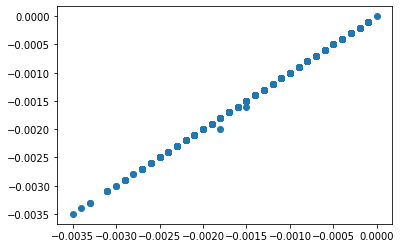

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(df_combined["SaTime2"], df_combined["SaTime3"], 'o')

array([[<AxesSubplot:xlabel='climbRate', ylabel='climbRate'>,
        <AxesSubplot:xlabel='Sgz', ylabel='climbRate'>,
        <AxesSubplot:xlabel='p', ylabel='climbRate'>,
        <AxesSubplot:xlabel='q', ylabel='climbRate'>,
        <AxesSubplot:xlabel='curRoll', ylabel='climbRate'>,
        <AxesSubplot:xlabel='absRoll', ylabel='climbRate'>,
        <AxesSubplot:xlabel='diffClb', ylabel='climbRate'>,
        <AxesSubplot:xlabel='diffRollRate', ylabel='climbRate'>,
        <AxesSubplot:xlabel='diffDiffClb', ylabel='climbRate'>,
        <AxesSubplot:xlabel='SaTime1', ylabel='climbRate'>,
        <AxesSubplot:xlabel='SaTime2', ylabel='climbRate'>,
        <AxesSubplot:xlabel='SaTime3', ylabel='climbRate'>,
        <AxesSubplot:xlabel='SaTime4', ylabel='climbRate'>,
        <AxesSubplot:xlabel='diffSaTime1', ylabel='climbRate'>,
        <AxesSubplot:xlabel='diffSaTime2', ylabel='climbRate'>,
        <AxesSubplot:xlabel='diffSaTime3', ylabel='climbRate'>,
        <AxesSubplot:xlabel='diff

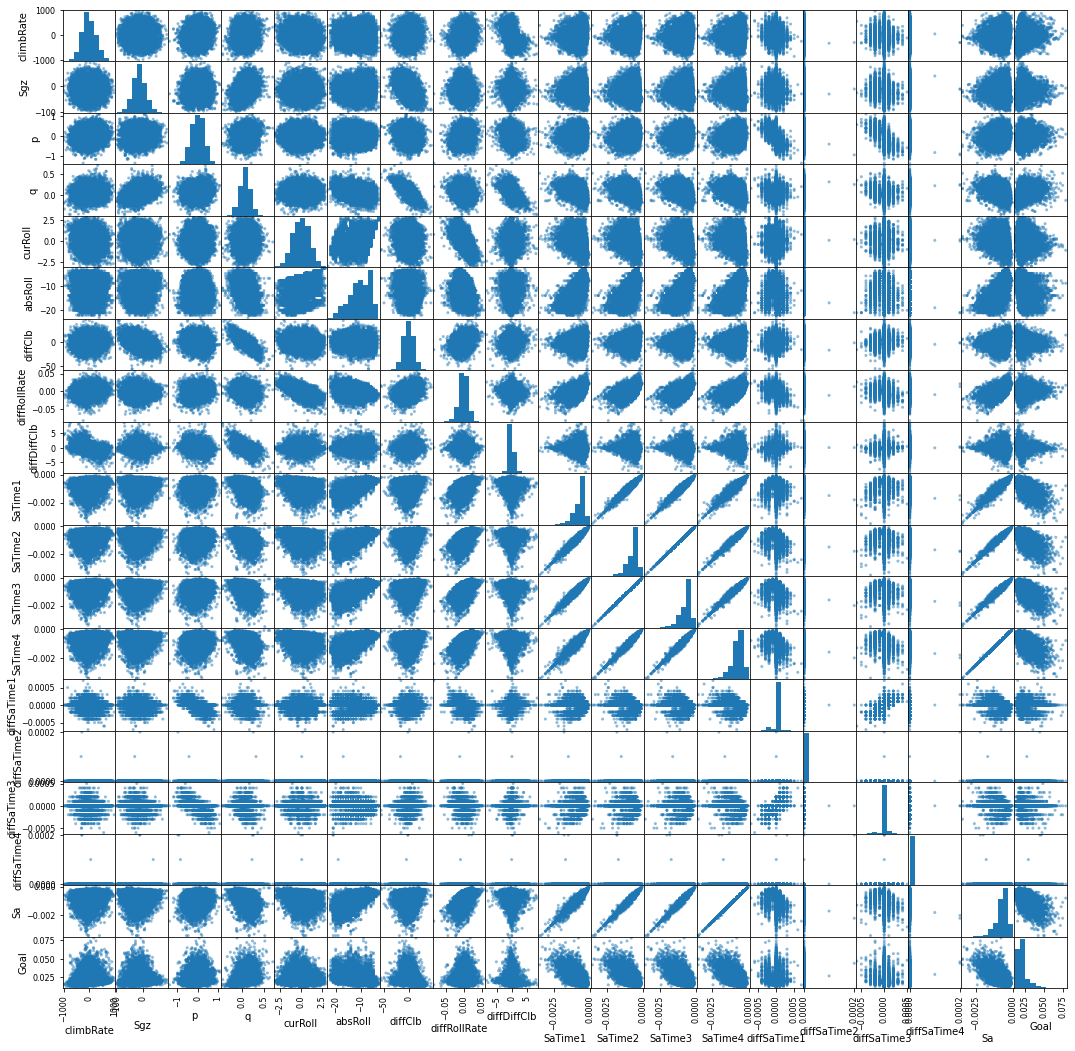

In [18]:
from pandas.plotting import scatter_matrix

scatter_matrix(df_combined, figsize=(18, 18))

## Conclusion

- use `Goal` as target variable
- no cleaning steps necessary